In [1]:
import numpy as np
import pandas as pd

In [3]:
pwd

'C:\\Users\\asy10\\2022_SwCapstoneDesign_GNN\\src\\typhoon_preprocessing'

In [4]:
import os

path = "C:\\Users\\asy10\\2022_SwCapstoneDesign_GNN\\src\\typhoon_preprocessing\\typhoon_data"
file_lst = os.listdir(path)

for i, file in enumerate(file_lst):
    
    file_lst[i] = os.path.join('./',file)

In [5]:
file_lst

['./10_tokage.csv',
 './11_hinnamno.csv',
 './1_malakas.csv',
 './2_megi.csv',
 './3_chaba.csv',
 './4_aere.csv',
 './5_songda.csv',
 './6_trases.csv',
 './7_mulan.csv',
 './8_meari.csv',
 './9_maon.csv']

In [6]:
cd typhoon_data

C:\Users\asy10\2022_SwCapstoneDesign_GNN\src\typhoon_preprocessing\typhoon_data


In [7]:
#10개 데이터셋을 모두 전처리 
def preprocessing(data):
    data = data.loc[data['Unnamed: 1'] == 0] # 실제 태풍 정보만 남기고 예측 정보는 모두 삭제 
    data =data.reset_index()
    drop_c = ['70% 확률 반경(km)','진행방향','Unnamed: 1']
    data = data.drop(columns=drop_c)
    g_range = {'강도' : {'-':0, '중':1, '강':2, '매우 강':3, '초강력':4}}
    c_range = {'크기' : {'-':0, '소형':1,'중형':2}}
    data = data.replace(g_range)
    data = data.replace(c_range)
    return data

In [8]:
# 동적변수 생성 data1, data2.. data10
# 후에 데이터 전처리 
data_list = []
for i in range(0,len(file_lst)):
    globals()['data{}'.format(i)] = pd.read_csv(file_lst[i],encoding='cp949')
    globals()['data{}'.format(i)] = preprocessing(globals()['data{}'.format(i)])
    data_list.append(globals()['data{}'.format(i)])

In [ ]:
data_list

In [10]:
#for i in range(0,len(file_lst)):
#    print("==============")
#    print(data_list[i]['이동속도(km/h)'])

In [18]:
## graph 생성 

import networkx as nx

for i in range(0,len(file_lst)):
    # 10개의 방향그래프 생성 
    globals()['G{}'.format(i)] = nx.DiGraph()
    # 노드생성 
    globals()['G{}'.format(i)].add_nodes_from(globals()['data{}'.format(i)].index)
    for j in range(0,len(data_list[i])):
        # 노드에 feature 넣기 
        globals()['G{}'.format(i)].add_node(j,
                                        speed=data_list[i]['이동속도(km/h)'][j],
                                        lat=data_list[i]['위도(N)'][j], 
                                        long=data_list[i]['경도(E)'][j], 
                                        century=data_list[i]['강도'][j], 
                                        size=data_list[i]['크기'][j], 
                                        atmospheric_pressure=data_list[i]['중심기압'][j], 
                                        per_hour=data_list[i]['시속(km/h)'][j], 
                                        sec_hour=data_list[i]['초속(m/s)'][j])
        # 엣지 생성 
        globals()['G{}'.format(i)].add_edge(j,j+1) 
    print(file_lst[i])
    print("==================================")
    
    # 각 그래프의 노드 정보 확인     
    print(globals()['G{}'.format(i)].nodes(data=True))
    
    

./10_tokage.csv
[(0, {'speed': 38, 'lat': 24.4, 'long': 151.6, 'century': 0, 'size': 1, 'atmospheric_pressure': 1002, 'per_hour': 65, 'sec_hour': 18}), (1, {'speed': 23, 'lat': 25.0, 'long': 151.6, 'century': 0, 'size': 1, 'atmospheric_pressure': 1002, 'per_hour': 65, 'sec_hour': 18}), (2, {'speed': 22, 'lat': 26.2, 'long': 151.5, 'century': 0, 'size': 1, 'atmospheric_pressure': 998, 'per_hour': 68, 'sec_hour': 19}), (3, {'speed': 33, 'lat': 27.4, 'long': 151.0, 'century': 0, 'size': 1, 'atmospheric_pressure': 994, 'per_hour': 76, 'sec_hour': 21}), (4, {'speed': 26, 'lat': 28.6, 'long': 150.5, 'century': 0, 'size': 1, 'atmospheric_pressure': 992, 'per_hour': 83, 'sec_hour': 23}), (5, {'speed': 25, 'lat': 30.0, 'long': 150.0, 'century': 1, 'size': 1, 'atmospheric_pressure': 985, 'per_hour': 97, 'sec_hour': 27}), (6, {'speed': 32, 'lat': 31.6, 'long': 149.1, 'century': 1, 'size': 1, 'atmospheric_pressure': 975, 'per_hour': 115, 'sec_hour': 32}), (7, {'speed': 32, 'lat': 32.9, 'long': 148

### 그래프 그리기

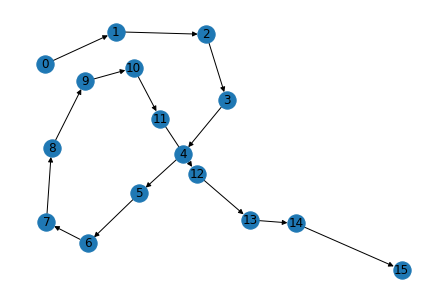

In [26]:
nx.draw(G0, with_labels=True)

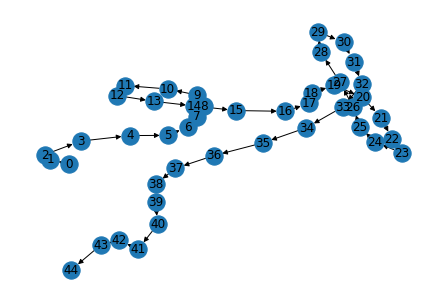

In [27]:
nx.draw(G1, with_labels=True)

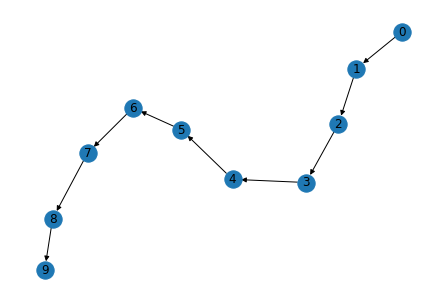

In [28]:
nx.draw(G3, with_labels=True)

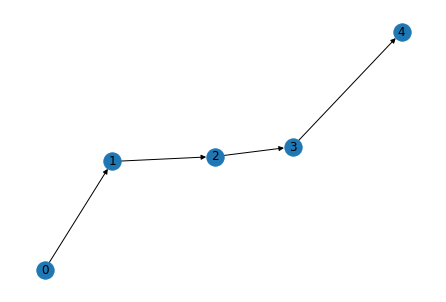

In [29]:
nx.draw(G7, with_labels=True)

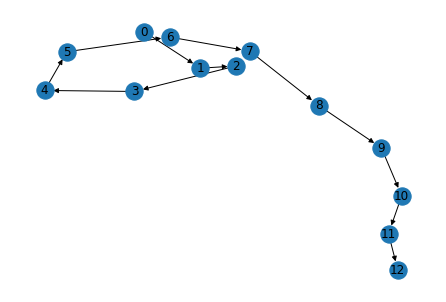

In [30]:
nx.draw(G9, with_labels=True)